In [3]:
import numpy as np
import pandas as pd
import yfinance as yf 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
assets=['PG', '^GSPC']
pf_data=yf.download(assets, start='2010-01-01') ['Adj Close']
pf_data.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,PG,^GSPC
Date,,
2010-01-04,39.902405,1132.989990
2010-01-05,39.915474,1136.520020
2010-01-06,39.726147,1137.140015
2010-01-07,39.510696,1141.689941
2010-01-08,39.458462,1144.979980


<Axes: xlabel='Date'>

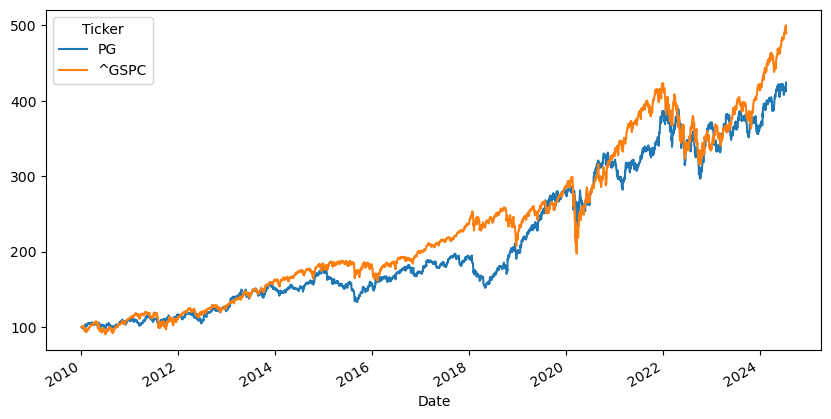

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [7]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns

Ticker,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004754,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878
...,...,...
2024-07-12,0.006443,0.005502
2024-07-15,-0.012259,0.002822
2024-07-16,0.014298,0.006369


In [8]:
log_returns.mean()*250

Ticker
PG       0.098424
^GSPC    0.108527
dtype: float64

In [9]:
log_returns.cov()*250

Ticker,PG,^GSPC
Ticker,,
PG,0.028929,0.016311
^GSPC,0.016311,0.029905


In [10]:
log_returns.corr()

Ticker,PG,^GSPC
Ticker,,
PG,1.000000,0.554555
^GSPC,0.554555,1.000000


In [11]:
num_assets = len(assets)

In [12]:
num_assets

2

In [13]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.51382603, 0.48617397])

In [14]:
weights[0] + weights[1]

1.0

expected porfolio return 

In [15]:
np.sum(weights * log_returns.mean()) * 250

0.10333577137472277

expected porfolio variance

In [16]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02285559645782537

expected porfolio volatility 

In [17]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.15118067488216003

In [18]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.1071302563331882,
  0.09946255106784624,
  0.10190979396471887,
  0.09986742419124943,
  0.10503259071792143,
  0.10496278627253999,
  0.09978532726778319,
  0.10343256023996253,
  0.1038038657017155,
  0.10379749094854138,
  0.0989155725706772,
  0.1019711054733451,
  0.09949127749108613,
  0.10676469765892278,
  0.10390935182562505,
  0.10258736671218922,
  0.10497989800532706,
  0.10571317661750167,
  0.10415698585891867,
  0.10018959276773703,
  0.10435753250906092,
  0.10074270906193744,
  0.10360623173771315,
  0.10703761102822912,
  0.10449533521255053,
  0.10263662247103487,
  0.09989331675809371,
  0.10344982000852512,
  0.10628643859087569,
  0.10605634256432514,
  0.10428896914719218,
  0.1077034336477891,
  0.10461357824551387,
  0.10574588787671205,
  0.10472445037627325,
  0.10230672003704656,
  0.10248043834317329,
  0.10765352993164178,
  0.10361021762814962,
  0.10066665228946448,
  0.10613386540393806,
  0.10397693893111608,
  0.10294913449145689,
  0.103931101603

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.1014229 , 0.10388711, 0.10248443, 0.10249977, 0.10357661,
        0.10052338, 0.10308056, 0.10660963, 0.10350128, 0.10539011,
        0.10572798, 0.10154608, 0.10615176, 0.10819276, 0.10359124,
        0.1017387 , 0.10242394, 0.10122108, 0.10555269, 0.10188447,
        0.10657694, 0.10450543, 0.10353768, 0.10743416, 0.10252826,
        0.10308468, 0.10278761, 0.09937301, 0.10555021, 0.10307217,
        0.1044818 , 0.10260955, 0.10432001, 0.10206129, 0.10553942,
        0.10320764, 0.10338787, 0.10724053, 0.10305536, 0.10274577,
        0.10219986, 0.10314487, 0.10218215, 0.10258597, 0.10569713,
        0.09859166, 0.10571771, 0.10385998, 0.10367334, 0.10698226,
        0.10478514, 0.10838833, 0.10446342, 0.09939927, 0.10012058,
        0.10821882, 0.10239944, 0.1001283 , 0.10379345, 0.1018167 ,
        0.10408493, 0.09964948, 0.10521153, 0.10640777, 0.10559192,
        0.10596323, 0.10220322, 0.10243068, 0.1034573 , 0.09938294,
        0.10066559, 0.10774286, 0.09872585, 0.10

In [20]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [21]:
portfolios.head()

,Return,Volatility
0,0.101423,0.154103
1,0.103887,0.151484
2,0.102484,0.151725
3,0.102500,0.151705
4,0.103577,0.151250


In [22]:
portfolios.tail()

,Return,Volatility
995,0.102820,0.151364
996,0.104044,0.151664
997,0.098508,0.169475
998,0.105223,0.154327
999,0.108096,0.169687


Text(0, 0.5, 'Expected Return')

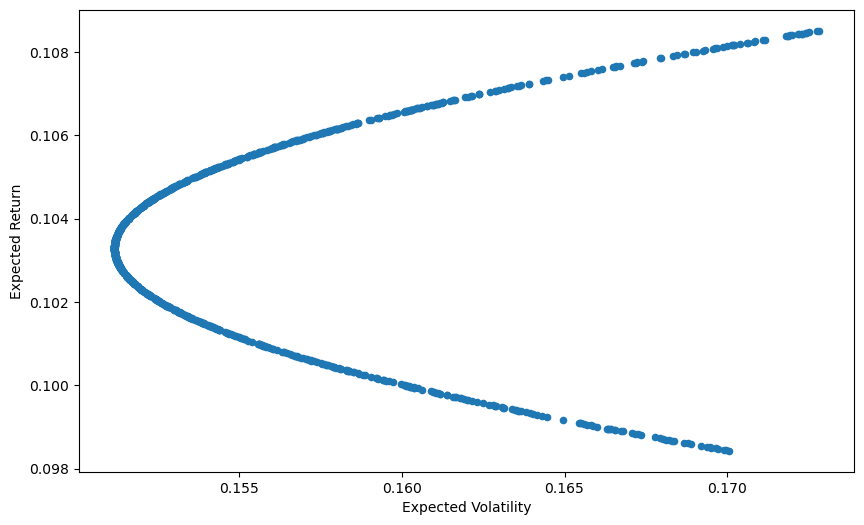

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')